In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df = pd.read_csv('final.csv')

# df1 = df.drop(['Unnamed: 0'],axis=1)
df1 = df.drop_duplicates().reset_index(drop=True)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
col = ['Blood Group ( is Negative?)','Jaundice','Diabetes','Risk']
for x in col:
    df1[x] = encoder.fit_transform(df1[x])
    
df2 = pd.get_dummies(df1,drop_first=True)

X = df2.drop(['Risk','Height','Weight'],axis=1)
y = df2.Risk

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [2]:
df2.shape

(3578, 18)

In [3]:
y_train.value_counts()

0    1841
1     663
Name: Risk, dtype: int64

In [4]:
y_test.value_counts()

0    786
1    288
Name: Risk, dtype: int64

In [5]:
len(X_train)

2504

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [7]:
def model(model,i):
    print(i,'.',model,':\n')
    model = model.fit(X_train,y_train)

    #train data
    y_pred = model.predict(X_train)
    print('\tTraining Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_train,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_train,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_train,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_train,y_pred, average='micro'),2)*100,'%',end=" ")

    #test data
    y_pred = model.predict(X_test)
    print('\n\tTesting Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_test,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_test,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_test,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_test,y_pred, average='micro'),2)*100,'%','\n')

In [8]:
model(LogisticRegression(),1)
model(SVC(),2)
model(DecisionTreeClassifier(),3)
model(RandomForestClassifier(),4)
model(KNeighborsClassifier(),5)
model(GaussianNB(),6)
model(MultinomialNB(),7)

1 . LogisticRegression() :

	Training Data:
		> Accuracy:  81.0 % 	> f1_score:  81.0 % 	> precision_score:  81.0 % 	> recall_score:  81.0 % 
	Testing Data:
		> Accuracy:  81.0 % 	> f1_score:  81.0 % 	> precision_score:  81.0 % 	> recall_score:  81.0 % 

2 . SVC() :

	Training Data:
		> Accuracy:  74.0 % 	> f1_score:  74.0 % 	> precision_score:  74.0 % 	> recall_score:  74.0 % 
	Testing Data:
		> Accuracy:  74.0 % 	> f1_score:  74.0 % 	> precision_score:  74.0 % 	> recall_score:  74.0 % 

3 . DecisionTreeClassifier() :

	Training Data:
		> Accuracy:  100.0 % 	> f1_score:  100.0 % 	> precision_score:  100.0 % 	> recall_score:  100.0 % 
	Testing Data:
		> Accuracy:  86.0 % 	> f1_score:  86.0 % 	> precision_score:  86.0 % 	> recall_score:  86.0 % 

4 . RandomForestClassifier() :

	Training Data:
		> Accuracy:  100.0 % 	> f1_score:  100.0 % 	> precision_score:  100.0 % 	> recall_score:  100.0 % 
	Testing Data:
		> Accuracy:  92.0 % 	> f1_score:  92.0 % 	> precision_score:  92.0 % 	> recall_

# Other Test

In [63]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
d = pd.read_csv('final.csv')

# df1 = df.drop(['Unnamed: 0'],axis=1)
d1 = d.drop_duplicates().reset_index(drop=True)

# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# col = ['Blood Group ( is Negative?)','Jaundice','Diabetes','Risk','Delivery Type','Edema','Anemia']
# for x in col:
#     df1[x] = encoder.fit_transform(df1[x])

In [64]:
d1['Anemia'].unique()

array(['Normal', 'Low', 'Very-Low'], dtype=object)

In [65]:
d1['Blood Group ( is Negative?)'] = d1['Blood Group ( is Negative?)'].map({'Yes':1,'No':0})
d1['Jaundice'] = d1['Jaundice'].map({'Yes':1,'No':0})
d1['Diabetes'] = d1['Diabetes'].map({'Yes':1,'No':0})
d1['Risk'] = d1['Risk'].map({'Yes':1,'No':0})
d1['Delivery Type'] = d1['Delivery Type'].map({'No_delivary':0,'Normal':1,'C-section':2})
d1['Edema'] = d1['Edema'].map({'Normal':0,'High':1,'Modarate':2})
d1['Anemia'] = d1['Anemia'].map({'Normal':0,'Low':1,'Very-Low':2})

In [66]:
d1.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
622,20,1.524,49.0,21.10,0,0,90,70,0,0,0,0,0,0,1
1141,27,1.575,56.3,22.70,0,0,110,80,0,0,0,0,0,0,2
3021,24,1.524,46.7,20.11,0,1,120,85,0,1,0,0,0,2,3
780,29,1.575,72.6,29.27,0,0,120,80,0,1,0,0,0,0,2
2195,20,1.524,45.5,19.59,0,1,110,70,0,1,0,0,0,1,2


In [67]:
d1 = d1.sample(frac=1).reset_index(drop=True)

In [68]:
length = int(len(df1)*0.70)

In [69]:
train = df1[:length]
test = df1[length:]

In [70]:
x_tt = train.drop(['Risk','Height','Weight'],axis=1)
y_tt = train.Risk

In [71]:
train.shape

(2504, 15)

In [72]:
x_te = test.drop(['Risk','Height','Weight'],axis=1)
y_te = test.Risk

In [73]:
y_te.value_counts()

No     794
Yes    280
Name: Risk, dtype: int64

In [74]:
y_tt.value_counts()

No     1833
Yes     671
Name: Risk, dtype: int64

In [75]:
def model(model,i):
    print(i,'.',model,':\n')
    model = model.fit(x_tt,y_tt)

    #train data
    y_pred = model.predict(x_tt)
    print('\tTraining Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_tt,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_tt,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_tt,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_tt,y_pred, average='micro'),2)*100,'%',end=" ")

    #test data
    y_pred = model.predict(x_te)
    print('\n\tTesting Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_te,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_te,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_te,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_te,y_pred, average='micro'),2)*100,'%','\n')

In [76]:
model(LogisticRegression(),1)
model(SVC(),2)
model(DecisionTreeClassifier(),3)
model(RandomForestClassifier(),4)
model(KNeighborsClassifier(),5)
model(GaussianNB(),6)
model(MultinomialNB(),7)

1 . LogisticRegression() :



ValueError: could not convert string to float: 'No'

In [28]:
rm_model = RandomForestClassifier()
rm_model.fit(x_tt,y_tt)

#train data
yt_pred = rm_model.predict(x_tt)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_tt,yt_pred),2))
print('f1_score: ', round(f1_score(y_tt,yt_pred, average='micro'),2))
print('precision_score: ', round(precision_score(y_tt,yt_pred, average='micro'),2))
print('recall_score: ', round(recall_score(y_tt,yt_pred, average='micro'),2))

#test data
y_pred = rm_model.predict(x_te)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_te,y_pred),2))
print('f1_score: ', round(f1_score(y_te,y_pred, average='micro'),2))
print('precision_score: ', round(precision_score(y_te,y_pred, average='micro'),2))
print('recall_score: ', round(recall_score(y_te,y_pred, average='micro'),2))

Training Data:
Accuracy:  1.0
f1_score:  1.0
precision_score:  1.0
recall_score:  1.0

Testing Data:
Accuracy:  0.92
f1_score:  0.92
precision_score:  0.92
recall_score:  0.92


model test AUC score: 0.8676084896303969
model train AUC score: 0.9969198067252526


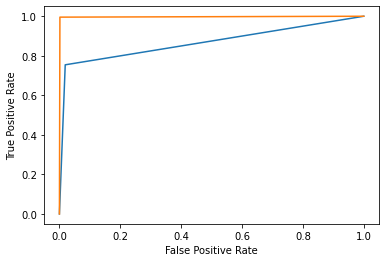

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
#     plt.plot(thresholds)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_te,y_pred)
plot_roc_curve(y_tt,yt_pred)
print(f'model test AUC score: {roc_auc_score(y_te,y_pred)}')
print(f'model train AUC score: {roc_auc_score(y_tt,yt_pred)}')

In [ ]:
# from sklearn import tree
# import sys
# plt.figure(figsize=(100,100))
# tree.plot_tree(dt_model,feature_names=X_train.columns)
# plt.savefig("tree.png")

In [30]:
df[df.Age <18]['Risk'].value_counts()

Yes    60
Name: Risk, dtype: int64